In [1]:
import pandas as pd
from datetime import date, timedelta
import win32com.client as win32
import teradatasql
import seaborn as sns
from phik.report import plot_correlation_matrix
from phik import report
import matplotlib.pyplot as plt
import pygwalker as pyg
import folium 
from folium.plugins import MarkerCluster, HeatMap
import requests
from xml.etree import ElementTree
import numpy as np

c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
user="vitaly.flerin"
password="4GyyERMq!!!"
query = '''select * from uat_ca.vf_rostov_research_06072023'''

In [3]:
with teradatasql.connect(host="td2800.corp.tele2.ru", user=user, password=password,logmech="ldap", tmode="TERA" ) as connect:
    df = pd.read_sql(query, connect)
df

C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_5780\4148601419.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connect)


,subs_id,sector_name,BS_POSITION,coeff_80,calc_share,top_3,coeff_80_new,LON,LAT,ST_POINT
0,14997810.0,RO0096_013,POINT (39.632891 47.207977),NaN,1.000000,1,not_bad_coeff,39.632891,47.207977,POINT (39.632891 47.207977)
1,62222329.0,RO0511_023,POINT (40.054944 47.424111),NaN,0.500000,2,not_bad_coeff,40.054944,47.424111,POINT (40.054944 47.424111)
2,54562955.0,RO0227_015,POINT (39.398473 47.10864),NaN,0.500000,2,not_bad_coeff,39.398473,47.108640,POINT (39.398473 47.10864)
3,33686957.0,RO2056_012,POINT (40.090544 47.405919),NaN,1.000000,1,not_bad_coeff,40.090544,47.405919,POINT (40.090544 47.405919)
4,66877481.0,RO0364_082,POINT (42.772682 47.017456),NaN,1.000000,1,not_bad_coeff,42.772682,47.017456,POINT (42.772682 47.017456)
...,...,...,...,...,...,...,...,...,...,...
123360,47917763.0,RO0668_023,POINT (39.885833 47.813056),NaN,0.500000,2,not_bad_coeff,39.885833,47.813056,POINT (39.885833 47.813056)
123361,6815678.0,RO0600_012,POINT (40.220764 47.706652),NaN,1.000000,1,not_bad_coeff,40.220764,47.706652,POINT (40.220764 47.706652)
123362,5098310.0,RO3801_8,POINT (41.729333 49.634833),NaN,0.749151,1,not_bad_coeff,41.729333,49.634833,POINT (41.729333 49.634833)
123363,5098310.0,RO3801_5,POINT (41.729333 49.634833),NaN,0.250849,2,not_bad_coeff,41.729333,49.634833,POINT (41.729333 49.634833)


ф-я на добавление флага для домашнего, раб и макс


In [4]:
df_hwe_copy = df.copy()


In [5]:
df_hwe_copy.head(4)

,subs_id,sector_name,BS_POSITION,coeff_80,calc_share,top_3,coeff_80_new,LON,LAT,ST_POINT
0,14997810.0,RO0096_013,POINT (39.632891 47.207977),NaN,1.0,1,not_bad_coeff,39.632891,47.207977,POINT (39.632891 47.207977)
1,62222329.0,RO0511_023,POINT (40.054944 47.424111),NaN,0.5,2,not_bad_coeff,40.054944,47.424111,POINT (40.054944 47.424111)
2,54562955.0,RO0227_015,POINT (39.398473 47.10864),NaN,0.5,2,not_bad_coeff,39.398473,47.108640,POINT (39.398473 47.10864)
3,33686957.0,RO2056_012,POINT (40.090544 47.405919),NaN,1.0,1,not_bad_coeff,40.090544,47.405919,POINT (40.090544 47.405919)


In [7]:
df_hwe_copy.subs_id.nunique() # уникальных абонов

88937

ДОЛЯ СОВПАДЕНИЯ ВСЕХ ФЛАГОВ НА ОДНОЙ БС

In [19]:
#df_hwe_copy.to_excel('qwe.xlsx')

c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


<Axes: xlabel='LON', ylabel='LAT'>

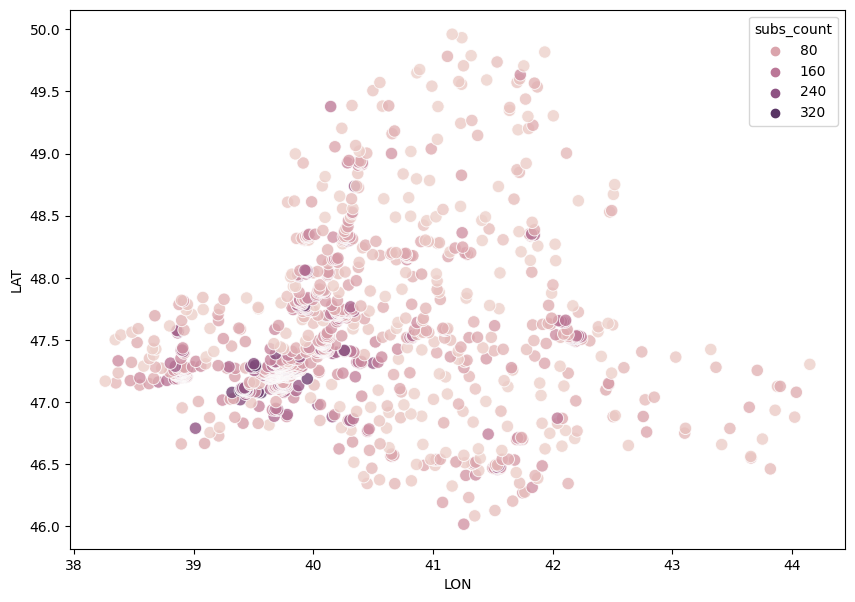

In [8]:
# Создаем датафрейм для распределения 
df_subs_count = df_hwe_copy.groupby(['LAT', 'LON', 'ST_POINT'], as_index=False)['subs_id'].count()
df_subs_count = df_subs_count.rename(columns={'subs_id': 'subs_count'})

# Создаем scatterplot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_subs_count, x='LON', y='LAT', hue='subs_count', cmap='cool', s=80, alpha=0.8)

In [9]:
df_subs_count.sort_values(by='subs_count', ascending=False ) # распределение

,LAT,LON,ST_POINT,subs_count
211,47.109972,39.418583,POINT (39.418583 47.109972),388
595,47.268889,39.862361,POINT (39.862361 47.268889),386
189,47.092220,39.390128,POINT (39.390128 47.09222),349
856,47.487181,40.098150,POINT (40.09815 47.487181),344
670,47.293250,39.515778,POINT (39.515778 47.29325),332
...,...,...,...,...
1267,48.656840,40.219770,POINT (40.21977 48.65684),1
152,46.976953,40.756493,POINT (40.756493 46.976953),1
147,46.957144,40.479117,POINT (40.479117 46.957144),1
130,46.885111,40.905175,POINT (40.905175 46.885111),1


<Axes: >

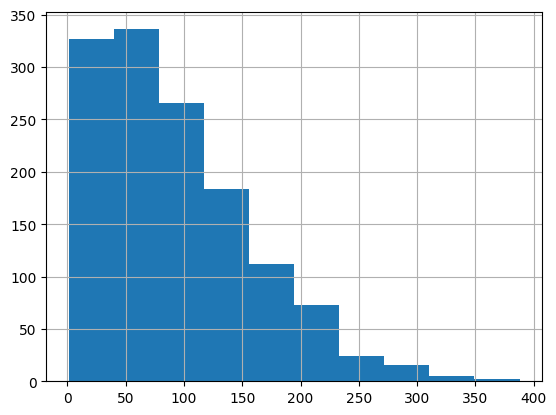

In [10]:
df_subs_count.subs_count.hist()

In [11]:
#находим выбросы
Q1 = df_subs_count["subs_count"].quantile(0.25)
Q3 = df_subs_count["subs_count"].quantile(0.75)
IQR = Q3 - Q1

# Определение границ выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Нахождение выбросов
outliers = df_subs_count[(df_subs_count['subs_count'] < lower_bound) | (df_subs_count['subs_count'] > upper_bound)]
outliers.subs_count.sort_values(ascending=True).head(5)

688    272
181    273
635    278
828    279
176    281
Name: subs_count, dtype: int64

In [17]:
#добавляем интерактив
# Создаем датафрейм для распределения подписчиков по регионам
df_subs_count = df_hwe_copy.groupby(['LAT', 'LON', 'ST_POINT'], as_index=False)['subs_id'].count()
df_subs_count = df_subs_count.rename(columns={'subs_id': 'subs_count'})
# Создаем карту
m = folium.Map(location=[df_subs_count['LAT'].mean(), df_subs_count['LON'].mean()], zoom_start=5)
# Создаем точечные маркеры для каждой точки и добавляем их на карту
for i, row in df_subs_count.iterrows():
    if row['subs_count'] >= 250:
        color = 'red'
    elif row['subs_count'] > 200 and row['subs_count'] < 250:
        color = 'blue'
    else:
        color = 'green'
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=row['subs_count']/25,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        tooltip=str(row['subs_count'])
    ).add_to(m)
m.save("HWE.html")

In [ ]:
#добавляем интерактив
# Создаем датафрейм для распределения подписчиков по регионам
df_subs_count = df_hwe_copy.query('flag_hwe == "1"').groupby(['LAT', 'LON', 'ST_POINT'], as_index=False)['subs_id'].count()
df_subs_count = df_subs_count.rename(columns={'subs_id': 'subs_count'})
# Создаем карту
m = folium.Map(location=[df_subs_count['LAT'].mean(), df_subs_count['LON'].mean()], zoom_start=5)
# Создаем точечные маркеры для каждой точки и добавляем их на карту
for i, row in df_subs_count.iterrows():
    if row['subs_count'] >= 72:
        color = 'red'
    elif row['subs_count'] > 45 and row['subs_count'] < 72:
        color = 'blue'
    else:
        color = 'green'
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=row['subs_count']/9,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        tooltip=str(row['subs_count'])
    ).add_to(m)
m#.save("HWE.html")

In [37]:
df_hwe_copy

,hwe_sector,subs_id,sector_name,BS_POSITION,coeff_80,top_3,coeff_80_new,LON,LAT,ST_POINT,REPORT_DATE,HOME_SECTOR,WORK_SECTOR,MAXDATA_SECTOR,subs_id_hwe,flag_hwe,flag_max,flag_work,flag
0,RO0096_3,14997810.0,RO0096_013,POINT (39.632891 47.207977),NaN,1,not_bad_coeff,39.632891,47.207977,POINT (39.632891 47.207977),2023-03-01,RO0096_013,RO0031_011,RO0030_013,14997810.0,0,0,0,0
1,RO0108_013,62222329.0,RO0108_016,POINT (39.701917 47.133167),NaN,1,not_bad_coeff,39.701917,47.133167,POINT (39.701917 47.133167),2023-03-01,RO0298_012,RO0511_3,RO0298_2,62222329.0,0,0,0,0
2,RO3212_2,54562955.0,RO3212_2,POINT (39.407972 47.111222),NaN,1,not_bad_coeff,39.407972,47.111222,POINT (39.407972 47.111222),2023-03-01,RO0227_012,RO0212_012,RO0227_012,54562955.0,0,0,0,0
3,RO2056_2,33686957.0,RO2056_012,POINT (40.090544 47.405919),NaN,1,not_bad_coeff,40.090544,47.405919,POINT (40.090544 47.405919),2023-03-01,RO0540_2,RO0540_2,RO0540_2,33686957.0,0,0,0,0
4,RO0364_2,66877481.0,RO0364_082,POINT (42.772682 47.017456),NaN,1,not_bad_coeff,42.772682,47.017456,POINT (42.772682 47.017456),2023-03-01,RO0364_2,RO0364_2,RO0364_2,66877481.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123360,RO0668_3,47917763.0,RO0668_023,POINT (39.885833 47.813056),NaN,2,not_bad_coeff,39.885833,47.813056,POINT (39.885833 47.813056),2023-03-01,RO0668_3,RO0668_3,RO0668_3,47917763.0,1,1,1,1
123361,RO0600_2,6815678.0,RO0600_012,POINT (40.220764 47.706652),NaN,1,not_bad_coeff,40.220764,47.706652,POINT (40.220764 47.706652),2023-03-01,RO0601_2,RO0600_2,RO0601_2,6815678.0,0,0,1,0
123362,RO3801_2,5098310.0,RO3801_8,POINT (41.729333 49.634833),NaN,2,not_bad_coeff,41.729333,49.634833,POINT (41.729333 49.634833),2023-03-01,RO0801_2,RO0801_2,RO0801_2,5098310.0,0,0,0,0
123363,RO3801_2,5098310.0,RO3801_5,POINT (41.729333 49.634833),NaN,1,not_bad_coeff,41.729333,49.634833,POINT (41.729333 49.634833),2023-03-01,RO0801_2,RO0801_2,RO0801_2,5098310.0,0,0,0,0


In [ ]:
# создаем список координат из df 
#Это строка кода создает список координат в формате, удобном для работы с модулем folium. 
# Она берет значения столбцов 'LAT' и 'LON' из датафрейма df и формирует список кортежей, содержащих значения этих столбцов. 
# Вот как это работает:df[['LAT', 'LON']] - выбираются столбцы 'LAT' и 'LON' из датафрейма df.values - преобразует эти столбцы в массив numpy.tolist() - преобразует массив numpy в список кортежей
locationlist = df[['LAT', 'LON']].values.tolist()

#итоговый вывод результата
#location - это определяет начальное местоположение карты. Здесь мы устанавливаем координаты [55.62252, 37.30162], что примерно соответствует городу Москва.
#tiles - это определяет тему карты. Мы выбрали тему 'CartoDB dark_matter', которая показывает карту в темной гамме.
#zoom_start - это задает начальный масштаб карты.
#Далее мы создаем объект marker_cluster - кластер маркеров для группировки сгенерированных маркеров на карте.
map3 = folium.Map(location=[47.222078, 39.720358], tiles='CartoDB dark_matter', zoom_start=8)
marker_cluster = MarkerCluster().add_to(map3)
# создаем маркеры на карте 
#Этот блок кода генерирует маркеры для каждой точки в списке координат locationlist и добавляет их в marker_cluster.
#Цикл for перебирает элементы locationlist - набор кортежей с координатами LAT и LON. 
# Для каждой точки мы создаем текстовое содержимое маркера (поле 'subs_id' из датафрейма df). 
# Затем мы добавляем маркер на карту используя folium.Marker. 
# В качестве аргументов этой функции мы передаем locationlist, координаты каждой точки, текстовое содержимое маркера (popup_text) и опции иконки маркера (icon).
# Мы добавляем каждый маркер в кластер marker_cluster с помощью метода .add_to().
#for point in range(0, min(len(locationlist), 1000)):
for point in range(len(locationlist)):
     # задаем текстовое содержимое маркера
    popup_text = f"ID:{df['subs_id'][point]}"
       # создаем маркер и добавляем его на карту
    folium.Marker(locationlist[point], popup=popup_text, icon=folium.Icon(icon='male', angle=0, prefix='fa')).add_to(marker_cluster)  
# выводим карту
map3#.save("map.html")

Для нахождения выбросов в столбце subs_id с помощью машинного обучения можно использовать алгоритмы аномалийного обнаружения, такие как One-Class SVM или Isolation Forest.

Пример кода для поиска выбросов с помощью One-Class SVM:

In [ ]:
#Пример кода для поиска выбросов с помощью Isolation Forest:
import pandas as pd
from sklearn.ensemble import IsolationForest
# Инициализация алгоритма Isolation Forest
clf = IsolationForest(n_estimators=100, contamination=0.05)
# Обучение алгоритма на данных
clf.fit(df_subs_count[['subs_count']])
# Определение, является ли каждое наблюдение выбросом (1) или нет (-1)
preds = clf.predict(df_subs_count[['subs_count']])
# Фильтрация выбросов
outliers = df_subs_count[preds == -1]
print(outliers)

In [ ]:
import pandas as pd
from sklearn.svm import OneClassSVM
# Инициализация алгоритма One-Class SVM
clf = OneClassSVM(kernel='rbf', nu=0.05)
# Обучение алгоритма на данных
clf.fit(df_subs_count[['subs_count']])
# Определение, является ли каждое наблюдение выбросом (1) или нет (-1)
preds = clf.predict(df_subs_count[['subs_count']])
# Фильтрация выбросов
outliers = df_subs_count[preds == -1]
print(outliers)